### Semi-Topological Codes
* Construction based off of https://arxiv.org/abs/2005.07016

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
import galois

In [2]:
def tanner_to_parity_check_mat(G: nx.Graph) -> np.array:
    """
    Converts Tanner graph 'G' into parity check matrix

    Parameters:
    -----------
    G - Tanner graph
    """
    num_var_nodes = 0
    num_check_nodes = 0
    check_node_list = []
    G_nodes = list(G.nodes)
    G_edges = list(G.edges)
    for node in G_nodes:
        if (node[0] == 'v'):
            num_var_nodes += 1
        else:
            num_check_nodes += 1
    
    mat = np.zeros((num_check_nodes, num_var_nodes))
    for edge in G_edges:
        if (edge[0][0] == 'c'):
            mat[int(edge[0][1])][int(edge[1][1])] = 1
        else:
            mat[int(edge[1][1])][int(edge[0][1])] = 1
    pc_mat_1 = nx.incidence_matrix(tan_graph_1)

def parity_check_mat_to_tanner(mat: np.array) -> nx.Graph:
    """ 
    Converts parity check matrix 'mat' into Tanner graph

    Parameters:
    -----------
    mat - parity check matrix
    """
    num_var_nodes = mat.shape[1]
    num_check_nodes = mat.shape[0]
    tan_graph = nx.Graph();
    for i in range(num_var_nodes):
        tan_graph.add_node("v" + str(i))

    for j in range(num_check_nodes):
        tan_graph.add_node("c" + str(j))

    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            if (mat[i][j] == 1):
                tan_graph.add_edge("c" + str(i), "v" + str(j))
    
    return tan_graph

In [25]:
def construct_graph_chain_segment(g: int) -> nx.Graph:
    """ 
    Construct augmentation tanner graph based on 'g' value 

    Parameters:
    -----------
    g - Level of augmentation

    Returns:
    --------
    Augmentation graph to be inserted in parent tanner graph of choice
    """
    aug_graph_pc_mat = np.eye(g)
    for i in range(g - 1):
        aug_graph_pc_mat[i][i + 1] = 1
    print(aug_graph_pc_mat)
    return parity_check_mat_to_tanner(aug_graph_pc_mat)

def relabel_nodes(chain_seg: nx.Graph) -> nx.Graph:
    """ 
    Rename nodes of graph chain segment according to where in parent graph it is going to be inserted.

    Parameters:
    -----------
    chain_seg - graph chain segment to be inserted in parent graph

    Returns:
    --------
    Graph chain segment with edges and nodes appropriately relabeled.
    """
    node_list = list(chain_seg.nodes)
    next_node_number = int(node_list[len(node_list) - 1][1]) + 1
    curr_node_number = next_node_number
    node_mapping_dict = {}
    count = 0
    while (node_list[count][0] == 'v'):
        node_mapping_dict[node_list[count]] = node_list[count][0] + str(curr_node_number)
        curr_node_number += 1
        count += 1

    curr_node_number = next_node_number 

    while (count < len(node_list) and list(node_list)[count][0] == 'c'):
        node_mapping_dict[node_list[count]] = node_list[count][0] + str(curr_node_number)
        curr_node_number += 1
        count += 1

    relabeled_graph = nx.relabel_nodes(chain_seg, node_mapping_dict, copy=True)
    return relabeled_graph
    


def g_augmented_ldpc_code(parent_graph: nx.Graph, g: int) -> nx.Graph:
    """ 
    Construct edge augmented LDPC code as per https://arxiv.org/abs/2005.07016 Section II

    Parameters:
    -----------
    parent_graph - Parent Graph in the edge augmented LDPC code construction
    g - Augmentation level of edge augmented LDPC code

    Returns:
    --------
    edge g-augmented LDPC code based on given 'parent_graph' with added 'graph_chain_segment' at every edge of 'parent_graph'
    """
    # Construct augmentation factor (tanner) graph based on 'g' value
    graph_chain_segment = construct_graph_chain_segment(g)

    # Replace each edge of 'parent_graph' with augmentation factor (tanner) graph
    parent_graph_cp = parent_graph.copy()
    edge_list = list(parent_graph.edges)
    for edge in edge_list:
        parent_graph_cp.remove_edge()

    # 

[[1. 1.]
 [0. 1.]]


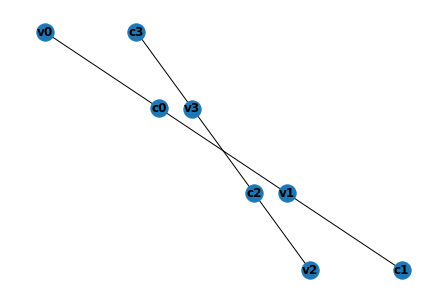

In [26]:
G = construct_graph_chain_segment(2)
nx.draw(G, with_labels=True, font_weight='bold')
new_G = relabel_nodes(G)
nx.draw(new_G, with_labels=True, font_weight='bold')


In [4]:
def construct_hypergraph_prod_code(pc_mat_1: np.array, pc_mat_2: np.array) -> Tuple:
    """ 
    Constructs hypergraph product code from 2 classical LDPC Code. 

    Parameters:
    -----------
    * pc_mat_1 - 1st parity-check matrix
    * pc_mat_2 - 2nd parity-check matrix

    Returns:
    * (X_pc_mat, Z_pc_mat) - Tuple where 1st element is the X-parity check matrix and 2nd element is the Z-parity check matrix
    """
    tan_graph_1 = parity_check_mat_to_tanner(pc_mat_1)
    tan_graph_2 = parity_check_mat_to_tanner(pc_mat_2)
    prod_code_graph = nx.cartesian_product(tan_graph_1, tan_graph_2)
    var_node_list = prod_code_vars(prod_code_graph)
    X_check_list = prod_code_checks_X(prod_code_graph)
    Z_check_list = prod_code_checks_Z(prod_code_graph)
    X_parity_check_mat = parity_check_mat_X(prod_code_graph, X_check_list, var_node_list)
    Z_parity_check_mat = parity_check_mat_Z(prod_code_graph, Z_check_list, var_node_list)
    return (X_parity_check_mat, Z_parity_check_mat)